In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import argparse
import glob
import pickle
from collections import OrderedDict
import math
%matplotlib inline

from matplotlib import rc
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = True
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'axes.titlesize':20, 'axes.labelsize':14, 'legend.fontsize':18, 'xtick.labelsize':12,
                     'ytick.labelsize':12, 'figure.figsize':(8.4,3.36), 'lines.linewidth':0.8})

#"figure.figsize":(4.2, 3.36)
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


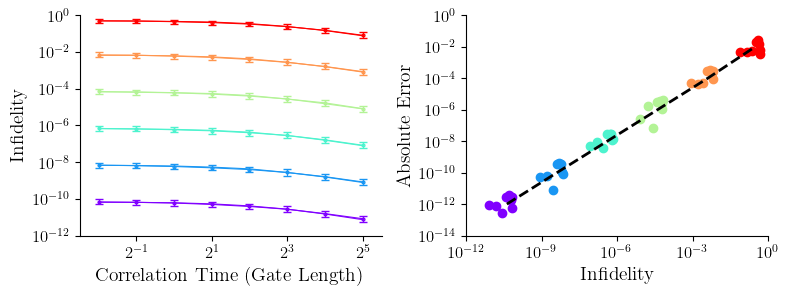

In [5]:
directory = 'src/output/zsyn'

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, )
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.tick_params(axis = "y", which = "both", left = False, right = False)
plt.grid(False)


if 'xsyn' in directory:
    title = "X Syndrome"
else:
    title = "Z Syndrome"

pickle_files = glob.glob(directory + "/*.p")

saved_data = [{}]*len(pickle_files)
for i in range(len(pickle_files)):
    output = pickle.load(open(pickle_files[i], 'rb'))
    output['filename'] = pickle_files[i]
    saved_data[i] = output

# Find number of unique time correlation values
power_values=set()
corr_values=set()
for data in saved_data:
    power_values.add(data['SPower'])
    corr_values.add(data['Bandwidth'])

corr_values = list(corr_values)
corr_values.sort(key=float)
power_values = list(power_values)
power_values.sort(key=float)

corr_plot_mezze_inf = OrderedDict()
corr_plot_schwarma_inf = OrderedDict()
corr_plot_schwarma_inf_stdev = OrderedDict()
corr_plot_x_axis = OrderedDict()

for el in power_values:
    corr_plot_mezze_inf[el] = []
    corr_plot_schwarma_inf[el] = []
    corr_plot_schwarma_inf_stdev[el] = []
    corr_plot_x_axis[el] = []

for data in saved_data:
    corr_plot_mezze_inf[data["SPower"]].append(data["FullSimInfidelity"])
    corr_plot_schwarma_inf[data["SPower"]].append(data["SchwARMAInfidelity"])
    corr_plot_schwarma_inf_stdev[data["SPower"]].append(np.std(data["AllSchwarmaInfidelities"]))
    corr_plot_x_axis[data["SPower"]].append(data["Bandwidth"])

# Schwarma/Mezze Bandwidth Errorbar
colors = cm.rainbow(np.linspace(0, 1, len(corr_plot_mezze_inf)))
c=0
inf_average=[]
for key in corr_plot_mezze_inf.keys():
    x_axis = corr_plot_x_axis[key]
    order = np.argsort(x_axis)
    x_axis = np.array(x_axis)[order]
    y_data_mezze = np.array(corr_plot_mezze_inf[key])[order]
    y_data_schwarma = np.array(corr_plot_schwarma_inf[key])[order]
    y_err_schwarma = np.array(0.434 * np.array(corr_plot_schwarma_inf_stdev[key]) / np.array(corr_plot_schwarma_inf[key]))[order]
    ax1.set_xscale("log", nonposx='clip', basex=2)
    ax1.plot(x_axis, np.log10(y_data_mezze), color=colors[c])
    ax1.errorbar(x_axis, np.log10(y_data_schwarma), yerr = y_err_schwarma, color=colors[c], 
                marker='o', label=str(key)+str(" SchWARMA"), capsize=3, markersize=2, markerfacecolor='None')
    abs_error = np.abs(y_data_schwarma - y_data_mezze)

    x2_axis = y_data_schwarma
    ax2.set_xscale("log", nonposx='clip', basex=10)
    ax2.plot(y_data_schwarma, np.log10(abs_error), color=colors[c], marker='o', linestyle='None')
    inf_average.append(np.mean(y_data_schwarma))
    #ax2.plot(y_data_schwarma, np.log10(power_values))

    c=c+1
ax2.plot(inf_average, np.log10(power_values), 'k--', linewidth=2)
#ax.set_title(str(title))
xlocs = [-3, -2, -1, 0, 1, 2]
ylocs = [-12, -10, -8, -6, -4, -2, 0]
ax1.set_ylim([-12,0])
ax1.set_xlim([2**-2.5, 2**5.5])
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_yticks(ylocs)
ax1.set_yticklabels(['$10^{'+str(int(loc))+'}$' for loc in ylocs])
ax1.set_ylabel("Infidelity")
ax1.set_xlabel("Correlation Time (Gate Length)")




ylocs = [-14, -12, -10, -8, -6, -4, -2, 0]
ax2.set_ylim([-14,0])
ax2.set_xlim([10**-12, 1])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_yticks(ylocs)
ax2.set_yticklabels(['$10^{'+str(int(loc))+'}$' for loc in ylocs])
#ax2.set_xticklabels(['$10^{'+str(int(loc))+'}$' for loc in ylocs])
ax2.set_ylabel("Absolute Error")
ax2.set_xlabel("Infidelity")



plt.tight_layout()
plt.savefig("./comparison_vs_correlation_errorbar_revised_zsyn.pdf", bbox_inches='tight')

plt.show()

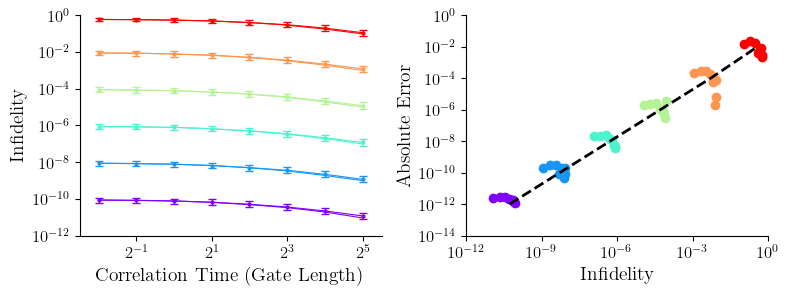

In [6]:
directory = 'src/output/xsyn'

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, )
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.tick_params(axis = "y", which = "both", left = False, right = False)
plt.grid(False)


if 'xsyn' in directory:
    title = "X Syndrome"
else:
    title = "Z Syndrome"

pickle_files = glob.glob(directory + "/*.p")

saved_data = [{}]*len(pickle_files)
for i in range(len(pickle_files)):
    output = pickle.load(open(pickle_files[i], 'rb'))
    output['filename'] = pickle_files[i]
    saved_data[i] = output

# Find number of unique time correlation values
power_values=set()
corr_values=set()
for data in saved_data:
    power_values.add(data['SPower'])
    corr_values.add(data['Bandwidth'])

corr_values = list(corr_values)
corr_values.sort(key=float)
power_values = list(power_values)
power_values.sort(key=float)

corr_plot_mezze_inf = OrderedDict()
corr_plot_schwarma_inf = OrderedDict()
corr_plot_schwarma_inf_stdev = OrderedDict()
corr_plot_x_axis = OrderedDict()

for el in power_values:
    corr_plot_mezze_inf[el] = []
    corr_plot_schwarma_inf[el] = []
    corr_plot_schwarma_inf_stdev[el] = []
    corr_plot_x_axis[el] = []

for data in saved_data:
    corr_plot_mezze_inf[data["SPower"]].append(data["FullSimInfidelity"])
    corr_plot_schwarma_inf[data["SPower"]].append(data["SchwARMAInfidelity"])
    corr_plot_schwarma_inf_stdev[data["SPower"]].append(np.std(data["AllSchwarmaInfidelities"]))
    corr_plot_x_axis[data["SPower"]].append(data["Bandwidth"])

# Schwarma/Mezze Bandwidth Errorbar
colors = cm.rainbow(np.linspace(0, 1, len(corr_plot_mezze_inf)))
c=0
inf_average=[]
for key in corr_plot_mezze_inf.keys():
    x_axis = corr_plot_x_axis[key]
    order = np.argsort(x_axis)
    x_axis = np.array(x_axis)[order]
    y_data_mezze = np.array(corr_plot_mezze_inf[key])[order]
    y_data_schwarma = np.array(corr_plot_schwarma_inf[key])[order]
    y_err_schwarma = np.array(0.434 * np.array(corr_plot_schwarma_inf_stdev[key]) / np.array(corr_plot_schwarma_inf[key]))[order]
    ax1.set_xscale("log", nonposx='clip', basex=2)
    ax1.plot(x_axis, np.log10(y_data_mezze), color=colors[c])
    ax1.errorbar(x_axis, np.log10(y_data_schwarma), yerr = y_err_schwarma, color=colors[c], 
                marker='o', label=str(key)+str(" SchWARMA"), capsize=3, markersize=2, markerfacecolor='None')
    abs_error = np.abs(y_data_schwarma - y_data_mezze)

    x2_axis = y_data_schwarma
    ax2.set_xscale("log", nonposx='clip', basex=10)
    ax2.plot(y_data_schwarma, np.log10(abs_error), color=colors[c], marker='o', linestyle='None')
    inf_average.append(np.mean(y_data_schwarma))
    #ax2.plot(y_data_schwarma, np.log10(power_values))

    c=c+1
ax2.plot(inf_average, np.log10(power_values), 'k--', linewidth=2)
#ax.set_title(str(title))
xlocs = [-3, -2, -1, 0, 1, 2]
ylocs = [-12, -10, -8, -6, -4, -2, 0]
ax1.set_ylim([-12,0])
ax1.set_xlim([2**-2.5, 2**5.5])
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_yticks(ylocs)
ax1.set_yticklabels(['$10^{'+str(int(loc))+'}$' for loc in ylocs])
ax1.set_ylabel("Infidelity")
ax1.set_xlabel("Correlation Time (Gate Length)")




ylocs = [-14, -12, -10, -8, -6, -4, -2, 0]
ax2.set_ylim([-14,0])
ax2.set_xlim([10**-12, 1])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_yticks(ylocs)
ax2.set_yticklabels(['$10^{'+str(int(loc))+'}$' for loc in ylocs])
#ax2.set_xticklabels(['$10^{'+str(int(loc))+'}$' for loc in ylocs])
ax2.set_ylabel("Absolute Error")
ax2.set_xlabel("Infidelity")



plt.tight_layout()
plt.savefig("./comparison_vs_correlation_errorbar_revised_xsyn.pdf", bbox_inches='tight')

plt.show()